In [1]:
import os
import pandas as pd

In [2]:
file = '/Users/andreaslawaetz/Streptomyces/dbcan_results/secreted_GH13/one_table_secreted_GH13.tsv'
df = pd.read_csv(file, sep = '\t', header = 0)

In [5]:
min(df['number_amylases'])

0

In [6]:
file = '/Users/andreaslawaetz/Streptomyces/Angeliga_project/SCOG/master_table_amyPhyloGroups_only.csv'
df = pd.read_csv(file, sep = ',', header = 0)

In [13]:
len(df[df['Group_1_amylase'] != 0]) / len(df)

0.8711864406779661

In [14]:
len(df[df['Group_2_amylase'] != 0]) / len(df)

0.8983050847457628

In [15]:
len(df[df['Group_3_amylase'] != 0]) / len(df)

0.2271186440677966

In [20]:
### merge t2o dataframes
file = '/Users/andreaslawaetz/Streptomyces/dbcan_results/secreted_GH13/one_table_secreted_GH13.tsv'
df1 = pd.read_csv(file, sep = '\t', header = 0)
file = '/Users/andreaslawaetz/Streptomyces/Angeliga_project/SCOG/amylase_inhibitors/Master_table_with_amyPhyloGroups_known_clusters_and_inhibitors_GatorAcarviosin_GatorAcarbose_gatorValidamycinA_gatorBafilomycin_tendamisatPFAM_tendamisatSMART_tendamisatPFAM_gatorTrestatin_acarviosinMinReq.csv'
df2 = pd.read_csv(file, sep = ',', header = 0)
merged = df2.merge(df1, on='tip_label', how='left')

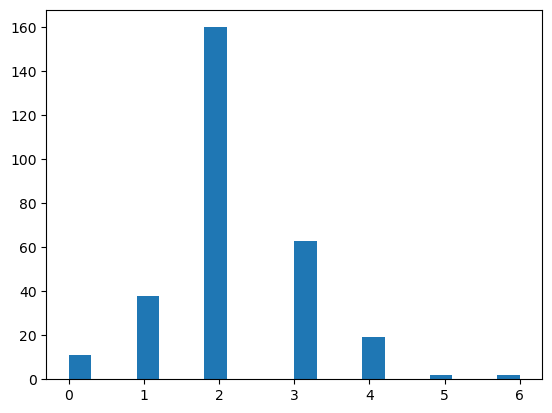

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

file = '/Users/andreaslawaetz/Streptomyces/Angeliga_project/SCOG/amylase_inhibitors/Master_table_with_amyPhyloGroups_known_clusters_and_inhibitors_GatorAcarviosin_GatorAcarbose_gatorValidamycinA_gatorBafilomycin_tendamisatPFAM_tendamisatSMART_tendamisatPFAM_gatorTrestatin_acarviosinMinReq.csv'
df = pd.read_csv(file, sep = ',', header = 0)

plt.hist(df['number_amylases'].tolist(), bins=20)
plt.show()


In [27]:
from scipy.stats import shapiro

stat, p = shapiro(df['number_amylases'].tolist())
print("Statistic:", stat)
print("p-value:", p)

if p > 0.05:
    print("Data looks normally distributed (fail to reject H0).")
else:
    print("Data is NOT normally distributed (reject H0).")


Statistic: 0.8633833063433138
p-value: 1.7531434699159322e-15
Data is NOT normally distributed (reject H0).


In [28]:
from scipy.stats import normaltest

stat, p = normaltest(df['number_amylases'].tolist())
print("Statistic:", stat)
print("p-value:", p)


Statistic: 27.059634092283368
p-value: 1.3306845536634167e-06


In [5]:
from scipy.stats import mannwhitneyu

# Split data into two groups based on your binary variable
group1 = df.loc[df['tendamistatPFAM'] == 0, 'number_amylases']
group2 = df.loc[df['tendamistatPFAM'] != 0, 'number_amylases']

stat, p = mannwhitneyu(group1, group2, alternative='two-sided')

print("Statistic:", stat)
print("p-value:", p)

if p < 0.05:
    print("Significant difference between the groups.")
else:
    print("No significant difference between the groups.")


Statistic: 3553.5
p-value: 0.0029272612277159095
Significant difference between the groups.


In [6]:
# Effect size r (rank-biserial correlation)
n1 = len(group1)
n2 = len(group2)
rbc = 1 - (2 * stat) / (n1 * n2)

print("Rank-biserial correlation:", rbc)


Rank-biserial correlation: 0.27227114478804015


In [12]:
a = len(df[(df['tendamistatPFAM'] == 0) & (df['Group_3_amylase'] == 0)])
b = len(df[(df['tendamistatPFAM'] == 0) & (df['Group_3_amylase'] == 1)])
c = len(df[(df['tendamistatPFAM'] == 1) & (df['Group_3_amylase'] == 0)])
d = len(df[(df['tendamistatPFAM'] == 1) & (df['Group_3_amylase'] == 1)])
print(f'a = {a}')
print(f'b = {b}')
print(f'c = {c}')
print(f'd = {d}')

a = 206
b = 51
c = 22
d = 15


In [13]:
a + b + c + d

294

In [14]:
import pandas as pd
from scipy.stats import chi2_contingency

# Build the contingency table
table = pd.DataFrame([[206, 51],
                      [22, 15]],
                     index=['tendamistat=0', 'tendamistat=1'],
                     columns=['Group3=0', 'Group3=1'])

chi2, p, dof, expected = chi2_contingency(table)

print(table)
print("\nChi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("\nExpected counts:\n", expected)


               Group3=0  Group3=1
tendamistat=0       206        51
tendamistat=1        22        15

Chi-square statistic: 6.813238503336804
p-value: 0.0090484515008213
Degrees of freedom: 1

Expected counts:
 [[199.30612245  57.69387755]
 [ 28.69387755   8.30612245]]


In [15]:
import numpy as np

a, b, c, d = 206, 51, 22, 15
phi = (a*d - b*c) / np.sqrt((a+b)*(c+d)*(a+c)*(b+d))

print("Phi coefficient:", phi)


Phi coefficient: 0.16451984024654395


In [32]:
max(df['number_amylases'])

6

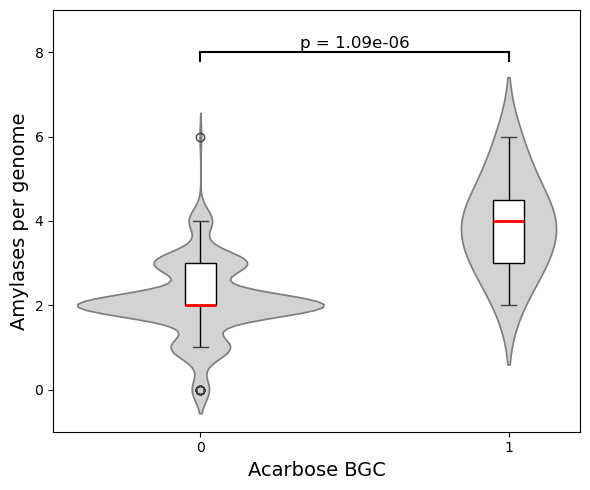

In [56]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Compute Mann–Whitney U test
group0 = df[df['gator_acarbose'] == 0]['number_amylases']
group1 = df[df['gator_acarbose'] == 1]['number_amylases']
stat, p_value = mannwhitneyu(group0, group1, alternative='two-sided')

plt.figure(figsize=(6, 5))

# Violin plot
sns.violinplot(
    data=df,
    x='gator_acarbose',
    y='number_amylases',
    inner=None,          # turn off seaborn's built-in quartile lines
    color='lightgray'    # or any neutral color
)

# Box plot on top
sns.boxplot(
    data=df,
    x='gator_acarbose',
    y='number_amylases',
    width=0.1,           # narrower box
    showcaps=True,
    boxprops={'facecolor':'white', 'edgecolor':'black'},
    whiskerprops={'color':'black'},
    medianprops={'color':'red', 'linewidth':2},
)

y_max = df['number_amylases'].max() + 0.5  # place line above the tallest violin
plt.plot([0, 1], [8, 8], color='black', linewidth=1.5)  # line connecting the two groups
plt.plot([0, 0], [7.8, 8], color='black', linewidth=1.5)  # line connecting the two groups
plt.plot([1, 1], [7.8, 8], color='black', linewidth=1.5)  # line connecting the two groups
plt.text(0.5, 8 + 0.1, f'p = {p_value:.2e}', ha='center', fontsize=12)  # p-value text

plt.xlabel('Acarbose BGC', fontsize=14)
plt.ylabel('Amylases per genome', fontsize=14)
plt.ylim(-1, 9)  # adjust y-axis to fit line and text
plt.tight_layout()
plt.savefig(os.path.join('/Users/andreaslawaetz/Streptomyces/Angeliga_project/SCOG/amylase_inhibitors/figures', 'violin_acarbose_nAmylases.pdf'), bbox_inches = 'tight')
plt.show()


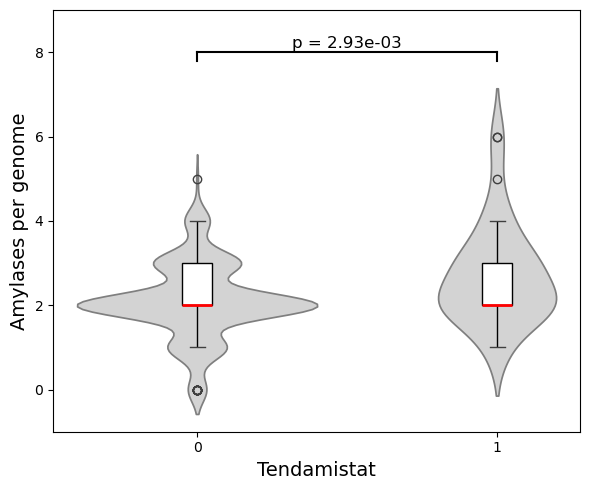

In [57]:
import os

# Compute Mann–Whitney U test
group0 = df[df['tendamistatPFAM_binary'] == 0]['number_amylases']
group1 = df[df['tendamistatPFAM_binary'] == 1]['number_amylases']
stat, p_value = mannwhitneyu(group0, group1, alternative='two-sided')

plt.figure(figsize=(6, 5))

# Violin plot
sns.violinplot(
    data=df,
    x='tendamistatPFAM_binary',
    y='number_amylases',
    inner=None,          # turn off seaborn's built-in quartile lines
    color='lightgray'    # or any neutral color
)

# Box plot on top
sns.boxplot(
    data=df,
    x='tendamistatPFAM_binary',
    y='number_amylases',
    width=0.1,           # narrower box
    showcaps=True,
    boxprops={'facecolor':'white', 'edgecolor':'black'},
    whiskerprops={'color':'black'},
    medianprops={'color':'red', 'linewidth':2},
)

y_max = df['number_amylases'].max() + 0.5  # place line above the tallest violin
plt.plot([0, 1], [8, 8], color='black', linewidth=1.5)  # line connecting the two groups
plt.plot([0, 0], [7.8, 8], color='black', linewidth=1.5)  # line connecting the two groups
plt.plot([1, 1], [7.8, 8], color='black', linewidth=1.5)  # line connecting the two groups
plt.text(0.5, 8 + 0.1, f'p = {p_value:.2e}', ha='center', fontsize=12)  # p-value text

plt.xlabel('Tendamistat', fontsize=14)
plt.ylabel('Amylases per genome', fontsize=14)
plt.ylim(-1, 9)  # adjust y-axis to fit line and text
plt.tight_layout()
plt.savefig(os.path.join('/Users/andreaslawaetz/Streptomyces/Angeliga_project/SCOG/amylase_inhibitors/figures', 'violin_tendamistat_nAmylases.pdf'), bbox_inches = 'tight')
plt.show()
